**Question 1:** What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

**Answer:**


| Aspect                       | **K-Means Clustering**                                                             | **Hierarchical Clustering**                                                                                     |
| ---------------------------- | ---------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Approach**                 | Partitional clustering – splits the dataset into *k* non-overlapping clusters.     | Agglomerative (bottom-up) or Divisive (top-down) clustering builds a *hierarchy (tree/dendrogram)* of clusters. |
| **Input required**           | Number of clusters (*k*) must be specified in advance.                             | No need to specify *k* initially. You can choose the number of clusters later by cutting the dendrogram.        |
| **Scalability**              | Efficient on large datasets (time complexity \~ O(n*k*i), where *i* = iterations). | Computationally expensive (time complexity \~ O(n²)), not ideal for very large datasets.                        |
| **Cluster shape assumption** | Works best with spherical/equal-sized clusters. Sensitive to outliers.             | More flexible, can capture nested or irregular-shaped clusters.                                                 |
| **Result**                   | Produces a *flat partition* (just clusters, no hierarchy).                         | Produces a *hierarchical structure* of clusters.                                                                |

**Use Cases**

**K-Means** Example (Customer Segmentation in Retail):
A supermarket wants to group customers based on purchasing behavior (e.g., high spenders, discount seekers, seasonal buyers).
K-Means is efficient on large transactional datasets and can quickly partition customers into distinct groups for targeted marketing.

**Hierarchical Clustering** Example (Gene Expression Analysis in Bioinformatics):
In genetics research, scientists cluster genes with similar expression patterns.
Hierarchical clustering is useful because the dendrogram shows relationships at multiple levels (e.g., sub-groups of similar genes), giving more insight than just fixed partitions.

**Question 2:** Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


**Answer:**

Silhouette Score – Purpose

The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm.

It measures how well each data point fits within its assigned cluster compared to other clusters.

**How it works (intuition):**

**For each point:**

a(i): Average distance of the point to all other points in the same cluster (measures cohesion).

b(i): Minimum average distance of the point to all points in other clusters (measures separation).

The Silhouette Score for a point is:

s(i)=
max(a(i),b(i))
b(i)−a(i)
	​
𝑠
(
𝑖
)
s(i) ranges between -1 and +1

+1 → point is well-matched to its own cluster and far from others.

0 → point lies on the boundary between clusters.

-1 → point is probably in the wrong cluster.

The overall Silhouette Score is the mean of all
𝑠
(
𝑖
)
s(i).

**Purpose**

- Evaluate clustering performance without knowing ground truth labels.

- Compare algorithms (e.g., K-Means vs. Hierarchical).

- Find optimal number of clusters (k) → by running clustering with different k values and choosing the one with the highest silhouette score.

**Question 3:** What are the core parameters of DBSCAN, and how do they influence the
clustering process?


**Answer:**

**DBSCAN Core Parameters**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has two main parameters:

**1. ε (epsilon / eps)**

- The radius of the neighborhood around a point.

- Defines how close points must be to each other to be considered neighbors.

- Small ε → many points are treated as noise, clusters may fragment.

- Large ε → clusters may merge together, losing granularity.

**2. minPts (Minimum Points)**

- The minimum number of points required (including the point itself) within the ε-neighborhood for a point to be considered a core point.

- Small minPts → even sparse regions may form clusters.

- Large minPts → only dense regions become clusters, more noise points.

**How They Influence Clustering**

- **Core Point:** A point with at least minPts neighbors within ε.

- **Border Point:** A point within ε of a core point, but with fewer than minPts neighbors itself.

- **Noise Point (Outlier)**: Neither core nor border (too isolated).

**Question 4:** Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

**Answer:**

**1. Clustering relies on distance calculations**

- Both K-Means and DBSCAN use distance metrics (commonly Euclidean distance).

- If features are on different scales, the feature with the larger range dominates the distance calculation.

**Example:**

- Dataset with features: Age (20–60), Income (30k–100k).

- Without scaling: Income dominates, clustering will group people mostly by income, ignoring age.

**2. Effect on K-Means**

- K-Means computes cluster centroids by minimizing within-cluster sum of squared distances.

- If one feature has a much larger scale, the centroids shift toward that feature’s dimension.

- Result: distorted clusters.

**3. Effect on DBSCAN**

- DBSCAN defines neighborhoods using ε (radius).

- If one feature has larger values, ε needs to be very large, making smaller-scale features irrelevant.

- Proper scaling ensures ε meaningfully captures density across all features.

**Common Scaling Methods**

*Standardization (Z-score):*

x
′
=
σ
x−μ
	​
→ Centers data around 0 with standard deviation 1.

*Min-Max Normalization:*

x′=xmax​−xmin​x−xmin​​

Scales data into [0, 1] range.

**Robust Scaling:** Uses median and IQR, good for outliers.

**Question 5:** What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?


**Answer:**

**Elbow Method in K-Means Clustering**
Problem:

In K-Means, you need to predefine the number of clusters (k). But how do you know what’s the “right” value of k?

**How it Works**

- Run K-Means clustering for different values of k (e.g., k = 1 to 10).

- For each k, compute the Within-Cluster Sum of Squares (WCSS), also called inertia:

##WCSS=clusters∑​points∈cluster∑​(distance(point,centroid))2

- WCSS decreases as k increases (more clusters = smaller distances).
Plot k vs WCSS.

- Look for the point where the decrease in WCSS slows down sharply — forming an “elbow” shape.

*The elbow point is considered the optimal number of clusters.*

**Example Use Case**

- A retail company wants to segment customers.

- Run K-Means with k = 1 to 10.

- WCSS drops steeply until k = 3, then flattens.

- Conclusion: 3 clusters capture the natural segmentation of customers.

**Question 6:** Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.


**Answer:**

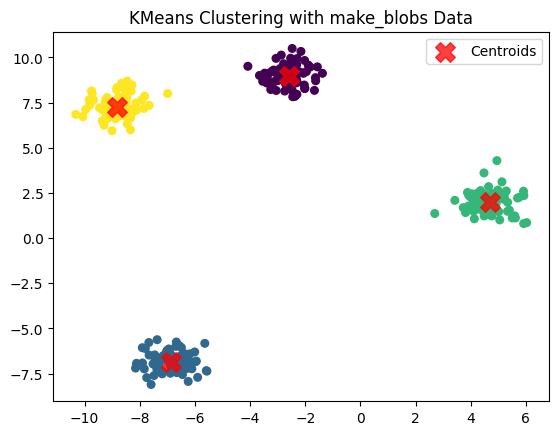

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap="viridis")

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", s=200, alpha=0.75, marker="X", label="Centroids")

plt.title("KMeans Clustering with make_blobs Data")
plt.legend()
plt.show()


**Question 7:** Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).


**Answer:**

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)  # try adjusting eps
labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


**Question 8**: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


**Answer:**

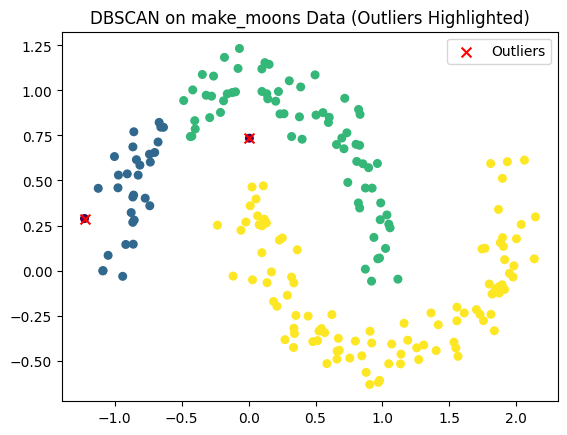

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (noise points are labeled as -1)
outliers = labels == -1

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(X[outliers, 0], X[outliers, 1], c="red", s=50, marker="x", label="Outliers")

plt.title("DBSCAN on make_moons Data (Outliers Highlighted)")
plt.legend()
plt.show()


**Question 9:** Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.


**Answer:**

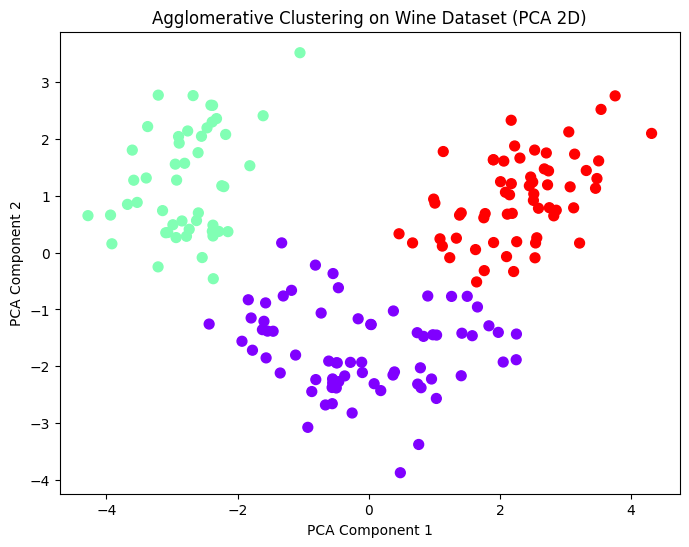

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg.fit_predict(X_pca)

# Step 5: Visualize the results in 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Question 10:** You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?


**Answer:**

**Workflow Explanation**

**1. Clustering Algorithm**

- I’d start with K-Means (efficient, works well on large datasets, easy to interpret).

- Optionally compare with Hierarchical Clustering (for understanding relationships) or DBSCAN (for detecting outliers / unusual customers).

**2. Preprocessing**

- Handle missing values (impute with mean/median for numerical, mode for categorical).

- Encode categorical variables (e.g., gender, location) using one-hot encoding.

- Scale all features using StandardScaler (K-Means is distance-based).

**3. Determining Number of Clusters**

- Use Elbow Method (SSE vs k).

- Use Silhouette Score (how well clusters are separated).

**4. Marketing Benefits**

- Segment customers into groups (e.g., high spenders, bargain hunters, category-specific buyers).

- Enable personalized promotions → higher engagement & conversion rates.

- Help identify loyal customers, churn risks, and cross-sell opportunities.

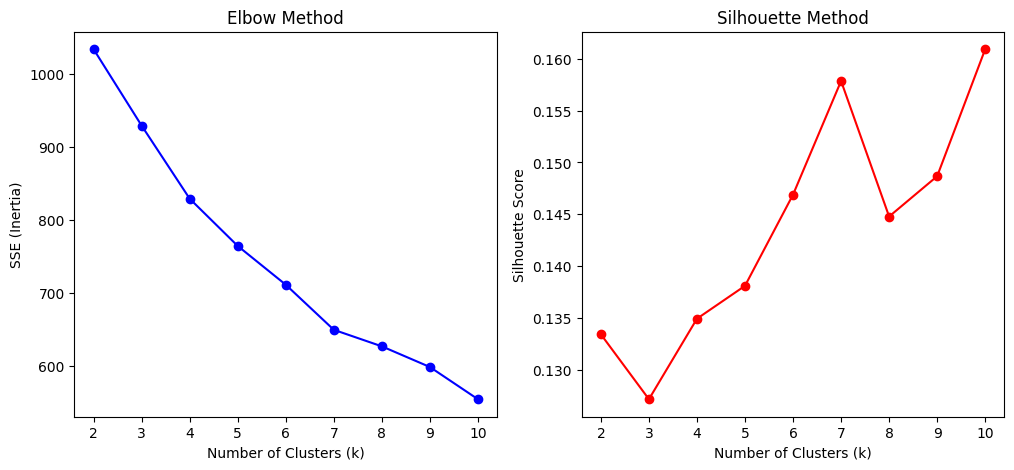

Cluster Profiles:
                Age  Annual_Income  Spending_Score  Electronics_Purchases  \
Cluster                                                                    
0        40.732143   88032.821429       27.357143              27.357143   
1        41.979592   62015.836735       50.469388              18.959184   
2        34.306122   89529.693878       49.346939              32.673469   
3        49.891304  105314.500000       78.739130              20.369565   

         Clothing_Purchases  Grocery_Purchases  
Cluster                                         
0                 21.035714          37.267857  
1                 11.183673          13.387755  
2                 36.163265          11.346939  
3                 27.565217          31.652174  


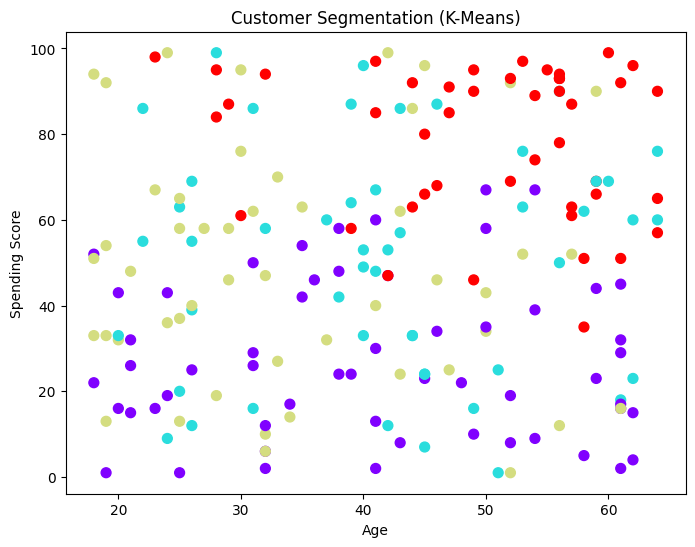

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# -----------------------
# Step 1: Simulated E-commerce Dataset
# -----------------------
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 65, 200),
    'Annual_Income': np.random.randint(20000, 150000, 200),
    'Spending_Score': np.random.randint(1, 100, 200),  # shopping habit score
    'Electronics_Purchases': np.random.randint(0, 50, 200),
    'Clothing_Purchases': np.random.randint(0, 50, 200),
    'Grocery_Purchases': np.random.randint(0, 50, 200)
}
df = pd.DataFrame(data)

# -----------------------
# Step 2: Handle Missing Values (if any)
# -----------------------
imputer = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# -----------------------
# Step 3: Feature Scaling
# -----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

# -----------------------
# Step 4: Determine Optimal Number of Clusters
# -----------------------
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # sum of squared errors
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# -----------------------
# Step 5: Apply K-Means with chosen k
# -----------------------
optimal_k = 4  # Assume from elbow/silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# -----------------------
# Step 6: Analyze Cluster Profiles
# -----------------------
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_summary)

# -----------------------
# Step 7: Visualize Clusters (Age vs Spending_Score for example)
# -----------------------
plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending_Score'], c=df['Cluster'], cmap='rainbow', s=50)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation (K-Means)")
plt.show()
